In [2]:
import pickle, os, re
from newsplease import NewsPlease
import gensim
import logging
from nltk import tokenize

logging.basicConfig(format="%(asctime)s : %(levelname)s : %(message)s", level=logging.INFO)

In [3]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

In [4]:
articles = []

for (dirpath, dirnames, filenames) in os.walk("."):
    for filename in filenames:
        i = 0
        if filename.endswith(".pkl"):
            filepath = os.path.join(dirpath, filename)
            with open(filepath, 'rb') as input_file:
                e = pickle.load(input_file)
                articles.append(e)

In [289]:
## filter articles
import datetime 

start = datetime.datetime(2012, 6, 1)
end = datetime.datetime(2013, 7, 1)

filtered_articles = []

for article in articles:
    if article.date_publish is not None:
        if article.date_publish < start or article.date_publish >= end:
            continue
    if article.text is None:
        continue
    elif len(article.text.split()) <= 100:
        continue 
        
    filtered_articles.append(article)
    
articles = filtered_articles


In [6]:
for art in filtered_articles:
    if "English-language" in art.text:
#         print(art.text)
#         print ("\n*******\n")
#         print (len(art.text.split()))
    print (art.title)
    print (art.date_publish)
#     print (tokenize.sent_tokenize(art.text))
    print ("\n*******\n")

IndentationError: expected an indented block (<ipython-input-6-474db9e44e62>, line 6)

In [7]:
# histogram of dates #
import numpy as np
import matplotlib.pyplot as plt
import datetime

dates = []
for article in articles:        
    if article.date_publish is None:
        continue
    dates.append(article.date_publish)

to_timestamp = np.vectorize(lambda x: x.timestamp())
from_timestamp = np.vectorize(lambda x: datetime.datetime.utcfromtimestamp(x))
time_stamps = to_timestamp(dates)

bins2012 = [datetime.datetime(2012, 6, 1), datetime.datetime(2012, 7, 1), datetime.datetime(2012, 8, 1), datetime.datetime(2012, 9, 1), datetime.datetime(2012, 10, 1), datetime.datetime(2012, 11, 1), datetime.datetime(2012, 12, 1)]
bins2013 = [datetime.datetime(2013, 1, 1), datetime.datetime(2013, 2, 1), datetime.datetime(2013, 3, 1), datetime.datetime(2013, 4, 1), datetime.datetime(2013, 5, 1), datetime.datetime(2013, 6, 1), datetime.datetime(2013, 7, 1)]
bins = to_timestamp(bins2012 + bins2013)

hist, bin_edges = np.histogram(time_stamps, bins=bins, range=None)

print (hist)
print (from_timestamp(bin_edges))

# plt.bar(bin_edges[:-1], hist)
# plt.show()

plt.figure(figsize=(10,5))

plt.hist(time_stamps, bins=(bins),color='#607c8e')
plt.show()  

[ 0  0  1 46  9 73  7 63  0 18 20 31  0]
[datetime.datetime(2012, 6, 1, 4, 0) datetime.datetime(2012, 7, 1, 4, 0)
 datetime.datetime(2012, 8, 1, 4, 0) datetime.datetime(2012, 9, 1, 4, 0)
 datetime.datetime(2012, 10, 1, 4, 0) datetime.datetime(2012, 11, 1, 4, 0)
 datetime.datetime(2012, 12, 1, 5, 0) datetime.datetime(2013, 1, 1, 5, 0)
 datetime.datetime(2013, 2, 1, 5, 0) datetime.datetime(2013, 3, 1, 5, 0)
 datetime.datetime(2013, 4, 1, 4, 0) datetime.datetime(2013, 5, 1, 4, 0)
 datetime.datetime(2013, 6, 1, 4, 0) datetime.datetime(2013, 7, 1, 4, 0)]


<Figure size 1000x500 with 1 Axes>

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/axes/_base.py:3610: MatplotlibDeprecationWarning: 
The `ymax` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `top` instead.
  alternative='`top`', obj_type='argument')


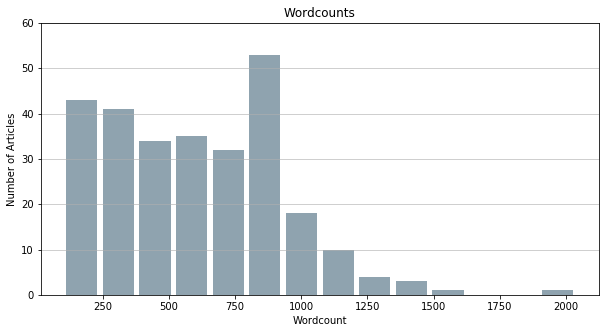

min: 102  max: 2039 mean: 603


In [8]:
# histogram of wordcounts #

import numpy as np
import matplotlib.pyplot as plt
import datetime

t = [len(article.text.split()) for article in articles]

plt.figure(figsize=(10,5))

n, bins, patches = plt.hist(x=t, bins='auto', color='#607c8e',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Wordcount')
plt.ylabel('Number of Articles')
plt.title('Wordcounts')
# plt.text(23, 45, r'$\mu=15, b=3$')
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

plt.show() 

print ("min:", min(t), " max:",max(t), "mean:", int(np.mean(np.array(t))))

In [9]:
# each entry is the words contained in a sentence
def break_into_sentences(articles):

    document_of_sentences = []
    
    i = 0
    for article in articles:
        title, date_publish, text = article.title, article.date_publish, article.text
        sentences = tokenize.sent_tokenize(text)
        
        i += 1
        if (i % 5000 == 0):
            logging.info("read {0} articles".format(i))

        sentences = [gensim.utils.simple_preprocess(s) for s in sentences]  
        document_of_sentences += sentences
    
    return document_of_sentences


document_of_sentences = list(break_into_sentences(articles))
logging.info ("Done reading data file")

2018-12-19 21:27:51,041 : INFO : Done reading data file


In [10]:
print (document_of_sentences[5])
print (len(document_of_sentences))

['hoping', 'to', 'take', 'look', 'at', 'both', 'extremes', 'as', 'well', 'as', 'the', 'middle', 'through', 'people', 'the', 'land', 'the', 'crops', 'and', 'animals', 'and', 'of', 'course', 'through', 'cooking']
7335


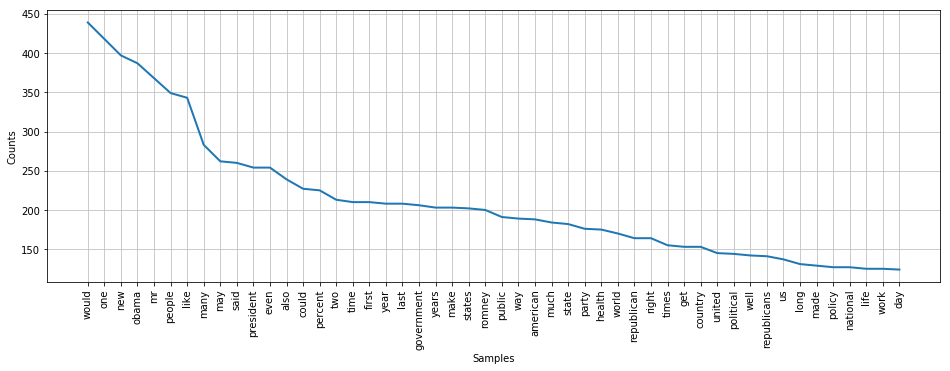

In [13]:
import matplotlib.pyplot as plt 
import nltk

words = [word for sentence in document_of_sentences for word in sentence]
words = [word for word in words if word.lower() not in stop_words and word.isalpha()]

freqdist = nltk.FreqDist(words)
plt.figure(figsize=(16,5))
freqdist.plot(50)
plt.show()

In [14]:
from collections import Counter
from nltk import ngrams

months = ["january","february","march","april","may","june","july","august","september","october","november","december"]

words = [word for word in words if word not in months]
ngram_counts = Counter(ngrams(words, 2))
ngram_counts.most_common(30)

[(('united', 'states'), 129),
 (('new', 'york'), 117),
 (('president', 'obama'), 91),
 (('mr', 'obama'), 81),
 (('health', 'care'), 58),
 (('mitt', 'romney'), 55),
 (('last', 'week'), 45),
 (('sex', 'marriage'), 38),
 (('last', 'year'), 38),
 (('years', 'ago'), 37),
 (('mr', 'romney'), 36),
 (('four', 'years'), 35),
 (('supreme', 'court'), 33),
 (('year', 'old'), 31),
 (('republican', 'party'), 29),
 (('white', 'house'), 27),
 (('public', 'health'), 26),
 (('even', 'though'), 25),
 (('high', 'school'), 25),
 (('al', 'qaeda'), 24),
 (('mr', 'silver'), 23),
 (('york', 'times'), 22),
 (('obama', 'campaign'), 22),
 (('george', 'bush'), 21),
 (('nicholas', 'kristof'), 21),
 (('york', 'city'), 20),
 (('social', 'media'), 20),
 (('long', 'term'), 20),
 (('wall', 'street'), 20),
 (('pro', 'choice'), 20)]

In [15]:
### TOPIC MODELING ###

In [16]:
import nltk
from nltk.corpus import wordnet as wn
def get_lemma(word):
    lemma = wn.morphy(word)
    if lemma is None:
        return word
    else:
        return lemma
    
from nltk.stem.wordnet import WordNetLemmatizer
def get_lemma2(word):
    return WordNetLemmatizer().lemmatize(word)

In [19]:
def prepare_text_for_lda(text):
    tokens = nltk.word_tokenize(text)
    tokens = [token for token in tokens if (token).isalpha() and len(token)>2]
    tokens = [token for token in tokens if token.lower() not in stop_words]
    tokens = [token for token in tokens if token.lower() not in months]
    tokens = [get_lemma2(token) for token in tokens]
    return tokens

In [136]:

freqdist = nltk.FreqDist(words)
fd = freqdist.most_common()
thresh = int(.05 * len(fd))
print (thresh)
filtered = [w for w,c in fd[thresh:]]
rejected_new = [w for w,c in fd[:thresh]]
# print ("REJECTED")
# print (rejected_new)
# print ("\n\n")
# print (fd[len(fd)-thresh:])
# return filtered

# w = filter_top_words(words)

769


In [386]:
# each entry is the words contained in a sentence
def break_into_articles(articles, keyword):

    document_of_articles = []
    
    i = 0
    for article in articles:
        title, date_publish, text = article.title, article.date_publish, article.text
        sentences = tokenize.sent_tokenize(text)
        tokened_s = [prepare_text_for_lda(sent) for sent in sentences]

        art = []
        i += 1
        for n, sent in enumerate(tokened_s):
            if keyword in sent:
                art += sent
        if len(art)>0:
            document_of_articles.append(art)
                
    #             if (i % 10 == 0):
    #                 logging.info("read {0} articles".format(i)) 
    #                 print (tokens)
#                 print (sentences[n])
#                 document_of_articles.append(tokens)
#                 print (text)
#                 print ("\n****\n")
    
    return document_of_articles


document_of_articles = list(break_into_articles(articles,keyword="Obama"))
romney_articles = list(break_into_articles(articles,keyword="Romney"))

print (document_of_articles[17])
print (len(document_of_articles))
# logging.info ("Done reading data file")

print (romney_articles[17])
print (romney_articles[50])
print (romney_articles[10])

['post', 'raising', 'doubt', 'analogy', 'Greg', 'Sargent', 'version', 'argument', 'emphasizes', 'philosophy', 'policy', 'seems', 'worth', 'highlighting', 'Obama', 'inaugural', 'speech', 'potential', 'turning', 'point', 'American', 'history', 'one', 'akin', 'Ronald', 'Reagan', 'inaugural', 'address', 'declared', 'Government', 'solution', 'problem', 'speech', 'articulate', 'conservative', 'philosophy', 'governance', 'declaration', 'ideological', 'victory', 'similarly', 'overarching', 'philosophical', 'argument', 'center', 'election', 'battle', 'Obama', 'build', 'speech', 'GOP', 'suggestion', 'President', 'redistributionist', 'collectivist', 'tendency', 'fundamentally', 'odds', 'nation', 'value', 'bottom', 'argument', 'true', 'nature', 'shared', 'responsibility', 'one', 'another', 'Republicans', 'angrily', 'argue', 'Obama', 'unfairly', 'caricatured', 'GOP', 'position', 'ethic', 'Obama', 'broadly', 'articulating', 'legitimate', 'philosophical', 'difference', 'party', 'election', 'result', 

In [142]:
words = [word for article in document_of_articles for word in article]
freqdist = nltk.FreqDist(words)
fd = freqdist.most_common()
thresh = int(.05 * len(fd))
print (thresh)
filtered = [w for w,c in fd[thresh:]]
rejected_two = [w for w,c in fd[:thresh]]
print ("REJECTED")
print (rejected_new)
print ("\n\n")
# print (fd[len(fd)-thresh:])
# return filtered

# w = filter_top_words(words)

409
REJECTED
['would', 'one', 'new', 'obama', 'mr', 'people', 'like', 'many', 'said', 'president', 'even', 'also', 'could', 'percent', 'two', 'time', 'first', 'year', 'last', 'government', 'years', 'make', 'states', 'romney', 'public', 'way', 'american', 'much', 'state', 'party', 'health', 'world', 'republican', 'right', 'times', 'get', 'country', 'united', 'political', 'well', 'republicans', 'us', 'long', 'made', 'policy', 'national', 'life', 'work', 'day', 'women', 'since', 'high', 'still', 'take', 'campaign', 'york', 'back', 'social', 'say', 'might', 'less', 'media', 'america', 'good', 'tax', 'americans', 'week', 'among', 'million', 'need', 'case', 'part', 'war', 'think', 'support', 'another', 'voters', 'care', 'system', 'three', 'school', 'china', 'law', 'know', 'want', 'every', 'see', 'election', 'news', 'far', 'never', 'gun', 'children', 'better', 'economic', 'including', 'point', 'go', 'big', 'end', 'marriage', 'vote', 'without', 'court', 'food', 'recent', 'editor', 'house', 'he

In [21]:
## tfidf ##
from sklearn.feature_extraction.text import TfidfVectorizer

text = [article.text for article in articles]
tfidf = TfidfVectorizer(tokenizer=prepare_text_for_lda,stop_words="english")
response = tfidf.fit_transform(text)

feature_names = tfidf.get_feature_names()

print (response.shape)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['le'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


(275, 13032)


In [22]:

# print (response.shape[0])

trimmed_docs = []

for doc_idx in range(0,1):
    doc = []
    
    for col in response.nonzero()[1]:
#         print (col, feature_names[col])
        tup = (feature_names[col], response[doc_idx,col])
        if tup[1]>0.02:
            doc.append(tup)
#         elif tup not in rejected and tup[1]<=0.02 and tup[1]>0:
#             rejected.add(tup)
    trimmed_docs.append(doc)
    print (doc_idx)
    
#     if doc_idx %  == 0:
#     print (doc_idx)
        
        
# results.sort(key=lambda x:x[1],reverse=True)
# for r in results:
#     print (r)
    
# print ("\n**rejected**\n")

# for r in rejected:
#     print (r)

0


In [83]:
# simple word frequency # 
idf = tfidf.idf_.tolist()

print (len(idf))
print (len(feature_names))
print (feature_names[0])


print (feature_names[:5])
print (idf[:5])

scores = []
for i, word in enumerate(feature_names):
    scores.append((word, idf[i]))
print (len(scores))
sorted_idfs = sorted(scores, key=lambda x:x[1], reverse=False)


thresh = int(.05*len(feature_names))
print ("thresh",thresh)


# rejected = [item[0] for item in sorted_idfs[:500]]

# is_noun = lambda pos: pos[:2] == 'NN'
# rejected = [word for (word, pos) in nltk.pos_tag(rejected) if is_noun(pos)] 

# print (rejected)

# indices = np.argsort(tfidf.idf_)[::-1]
# features = tfidf.get_feature_names()
# top_n = 100
# top_features = [features[i] for i in indices[:top_n]]
# print (top_features)

13032
13032
aaker
['aaker', 'aaron', 'abandon', 'abandoned', 'abandoning']
[5.5217885770490405, 5.5217885770490405, 4.828641396489095, 4.222505592918779, 5.5217885770490405]
13032
thresh 651
['new', 'year', 'time', 'like', 'make', 'way', 'state', 'people', 'american', 'president', 'right', 'country', 'said', 'say', 'world', 'obama', 'day', 'percent', 'week', 'need', 'government', 'work', 'national', 'policy', 'life', 'thing', 'united', 'know', 'republican', 'group', 'political', 'public', 'want', 'far', 'long', 'good', 'think', 'point', 'york', 'come', 'help', 'issue', 'case', 'including', 'end', 'support', 'recent', 'le', 'big', 'america', 'let', 'million', 'month', 'child', 'number', 'party', 'problem', 'result', 'better', 'health', 'fact', 'high', 'important', 'law', 'place', 'reason', 'school', 'change', 'different', 'view', 'woman', 'ago', 'news', 'really', 'today', 'washington', 'mean', 'campaign', 'care', 'clear', 'election', 'house', 'kind', 'likely', 'line', 'past', 'small', '

In [393]:
from gensim import corpora
from gensim.models import Phrases

# print (rejected)
doc = []
for bow in document_of_articles:
    filt_words = [word for word in bow if word.lower() != "obama" and word.lower() != "president"]# if word.lower() not in rejected_new]
    doc.append(filt_words)
    
# Add bigrams and trigrams to docs,minimum count 10 means only that appear 10 times or more.
bigram = Phrases(doc,min_count=5,threshold=10) #min_count=5, threshold=10
trigram = Phrases(bigram[doc])

# print (bigram[doc[3]])

updated_docs = [bigram[doc[i]] for i in range(len(doc))]

# for idx in range(len(doc)):
#     for token in bigram[doc[idx]]:
#         if '_' in token:
#             # Token is a bigram, add to document.
# #             doc[idx].append(token)
#             print (token)
#     for token in trigram[doc[idx]]:
#         if '_' in token:
#             # Token is a bigram, add to document.
# #             doc[idx].append(token)
#             print (token)
# #             print (doc[idx])
# #             print ("\n***\n")

# print (doc[2])

2018-12-20 20:05:45,605 : INFO : collecting all words and their counts
2018-12-20 20:05:45,606 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2018-12-20 20:05:45,619 : INFO : collected 7469 word types from a corpus of 5597 words (unigram + bigrams) and 95 sentences
2018-12-20 20:05:45,621 : INFO : using 7469 counts as vocab in Phrases<0 vocab, min_count=5, threshold=10, max_vocab_size=40000000>
2018-12-20 20:05:45,622 : INFO : collecting all words and their counts
2018-12-20 20:05:45,624 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2018-12-20 20:05:45,668 : INFO : collected 7467 word types from a corpus of 5527 words (unigram + bigrams) and 95 sentences
2018-12-20 20:05:45,669 : INFO : using 7467 counts as vocab in Phrases<0 vocab, min_count=5, threshold=10.0, max_vocab_size=40000000>


In [407]:
dictionary = corpora.Dictionary(updated_docs)

# dictionary.filter_extremes(no_above=0.01) #no below int, no above float, keep_n (int) – Keep only the first keep_n most frequent tokens.

corpus = [dictionary.doc2bow(text) for text in updated_docs]

print('Number of unique tokens: %d' % len(dictionary))
print('Number of documents: %d' % len(corpus))

# import pickle
# pickle.dump(corpus, open('corpus.pkl', 'wb'))
# dictionary.save('dictionary.gensim

2018-12-20 20:37:41,140 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-12-20 20:37:41,153 : INFO : built Dictionary(2513 unique tokens: ['CEOs', 'Greg', 'Laden', 'Montana', 'Philpott']...) from 95 documents (total 5527 corpus positions)


Number of unique tokens: 2513
Number of documents: 95


In [376]:
from gensim.models.coherencemodel import CoherenceModel

def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model=gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics)
        model_list.append(model)
#         coherence_values.append(ldamodel.log_perplexity(corpus))
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [408]:
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=corpus, texts=updated_docs, start=2, limit=60, step=6)

2018-12-20 20:37:44,110 : INFO : using symmetric alpha at 0.5
2018-12-20 20:37:44,112 : INFO : using symmetric eta at 0.5
2018-12-20 20:37:44,115 : INFO : using serial LDA version on this node
2018-12-20 20:37:44,117 : INFO : running online (single-pass) LDA training, 2 topics, 1 passes over the supplied corpus of 95 documents, updating model once every 95 documents, evaluating perplexity every 95 documents, iterating 50x with a convergence threshold of 0.001000
2018-12-20 20:37:44,118 : WARNING : too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
2018-12-20 20:37:44,266 : INFO : -8.487 per-word bound, 358.9 perplexity estimate based on a held-out corpus of 95 documents with 5527 words
2018-12-20 20:37:44,267 : INFO : PROGRESS: pass 0, at document #95/95
2018-12-20 20:37:44,414 : INFO : topic #0 (0.500): 0.006*"Romney" + 0.004*"Republican" + 0.003*"vote" + 0.003*"would" + 0.003*"Mitt_Romney" + 0.003*"campaign" + 0.00

2018-12-20 20:37:48,080 : INFO : PROGRESS: pass 0, at document #95/95
2018-12-20 20:37:48,211 : INFO : topic #18 (0.050): 0.006*"campaign" + 0.006*"social_medium" + 0.006*"vote" + 0.006*"million" + 0.006*"Romney" + 0.005*"Kenya" + 0.005*"climate" + 0.005*"many" + 0.005*"medium" + 0.005*"health_care"
2018-12-20 20:37:48,213 : INFO : topic #10 (0.050): 0.006*"debate" + 0.006*"new" + 0.006*"Republicans" + 0.006*"policy" + 0.005*"military" + 0.005*"climate" + 0.005*"making" + 0.005*"college" + 0.005*"year" + 0.005*"walked"
2018-12-20 20:37:48,215 : INFO : topic #1 (0.050): 0.008*"win" + 0.005*"Mitt_Romney" + 0.005*"number" + 0.005*"could" + 0.005*"Romney" + 0.004*"take" + 0.004*"Silver" + 0.004*"first" + 0.004*"would" + 0.004*"probability"
2018-12-20 20:37:48,217 : INFO : topic #0 (0.050): 0.009*"would" + 0.009*"Republicans" + 0.008*"want" + 0.007*"policy" + 0.006*"first" + 0.005*"something" + 0.005*"poll" + 0.005*"administration" + 0.005*"Clinton" + 0.005*"Bush"
2018-12-20 20:37:48,219 : 

2018-12-20 20:37:56,295 : INFO : PROGRESS: pass 0, at document #95/95
2018-12-20 20:37:56,417 : INFO : topic #19 (0.026): 0.009*"Murphy" + 0.009*"heresy" + 0.009*"intent" + 0.009*"McMahon" + 0.009*"one" + 0.009*"Linda" + 0.009*"electing" + 0.009*"Christopher" + 0.009*"Republicans" + 0.009*"enormously"
2018-12-20 20:37:56,419 : INFO : topic #30 (0.026): 0.020*"Romney" + 0.016*"tax" + 0.013*"leader" + 0.011*"voter" + 0.011*"resentment" + 0.011*"undecided" + 0.010*"likely" + 0.009*"racial" + 0.009*"party" + 0.009*"vote"
2018-12-20 20:37:56,420 : INFO : topic #31 (0.026): 0.015*"Korea" + 0.010*"everything" + 0.010*"administration" + 0.009*"war" + 0.009*"widening" + 0.009*"possible" + 0.009*"Palestinians" + 0.009*"Israel" + 0.009*"restrain" + 0.008*"cooperation"
2018-12-20 20:37:56,421 : INFO : topic #33 (0.026): 0.015*"Barack" + 0.015*"win" + 0.011*"sometimes" + 0.009*"John" + 0.009*"shared" + 0.009*"McCain" + 0.008*"among" + 0.008*"example" + 0.008*"supporter" + 0.008*"Biden"
2018-12-20 2

2018-12-20 20:38:11,103 : INFO : -73.443 per-word bound, 12835375235604009713664.0 perplexity estimate based on a held-out corpus of 95 documents with 5527 words
2018-12-20 20:38:11,106 : INFO : PROGRESS: pass 0, at document #95/95
2018-12-20 20:38:11,272 : INFO : topic #35 (0.018): 0.013*"debt" + 0.009*"poll" + 0.007*"Republican" + 0.007*"ceiling" + 0.006*"national" + 0.006*"Congress" + 0.006*"polling" + 0.006*"hope" + 0.006*"point" + 0.006*"make"
2018-12-20 20:38:11,274 : INFO : topic #43 (0.018): 0.012*"whether" + 0.012*"United_States" + 0.011*"climate" + 0.007*"anything" + 0.007*"change" + 0.007*"agree" + 0.007*"Address" + 0.007*"Prohibition" + 0.006*"pledge" + 0.006*"engage"
2018-12-20 20:38:11,276 : INFO : topic #44 (0.018): 0.010*"Republicans" + 0.010*"Christie" + 0.007*"year" + 0.007*"vote" + 0.005*"Chris" + 0.005*"know" + 0.005*"fiscal" + 0.005*"cut" + 0.005*"political" + 0.004*"see"
2018-12-20 20:38:11,278 : INFO : topic #32 (0.018): 0.012*"Romney" + 0.010*"convention" + 0.00

2 0.1536082368663821
8 0.3042476962972159
14 0.33784197679043876
20 0.35100368179466324
26 0.34201376588341986
32 0.34753386536348474
38 0.4065116808840404
44 0.45591560233470046
50 0.4476738468275929
56 0.49763835431185705


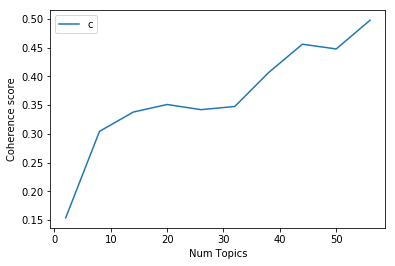

In [409]:
# Show graph
import matplotlib.pyplot as plt
limit=60; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)


for i, c in enumerate(coherence_values):
    print (x[i], c)


plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [413]:
import gensim

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

NUM_TOPICS =60
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=100)
# ldamodel.save('model5.gensim')


2018-12-20 20:40:08,642 : INFO : using symmetric alpha at 0.016666666666666666
2018-12-20 20:40:08,644 : INFO : using symmetric eta at 0.016666666666666666
2018-12-20 20:40:08,647 : INFO : using serial LDA version on this node
2018-12-20 20:40:08,668 : INFO : running online (multi-pass) LDA training, 60 topics, 100 passes over the supplied corpus of 95 documents, updating model once every 95 documents, evaluating perplexity every 95 documents, iterating 50x with a convergence threshold of 0.001000
2018-12-20 20:40:08,913 : INFO : -79.791 per-word bound, 1045753804554575712092160.0 perplexity estimate based on a held-out corpus of 95 documents with 5527 words
2018-12-20 20:40:08,914 : INFO : PROGRESS: pass 0, at document #95/95
2018-12-20 20:40:09,038 : INFO : topic #22 (0.017): 0.014*"making" + 0.011*"Republicans" + 0.009*"governing" + 0.008*"leader" + 0.008*"becoming" + 0.008*"draconian" + 0.008*"advised" + 0.008*"time" + 0.008*"choice" + 0.008*"presented"
2018-12-20 20:40:09,041 : IN

2018-12-20 20:40:09,920 : INFO : topic #19 (0.017): 0.001*"year" + 0.001*"time" + 0.001*"many" + 0.001*"way" + 0.001*"mean" + 0.001*"choice" + 0.001*"inauguration" + 0.001*"plan" + 0.001*"Four" + 0.001*"scope"
2018-12-20 20:40:09,923 : INFO : topic #44 (0.017): 0.015*"year" + 0.014*"plan" + 0.014*"country" + 0.010*"ago" + 0.010*"Four" + 0.010*"many" + 0.010*"say" + 0.010*"agenda" + 0.010*"crisis" + 0.010*"time"
2018-12-20 20:40:09,925 : INFO : topic #16 (0.017): 0.020*"million" + 0.020*"system" + 0.015*"could" + 0.015*"public" + 0.015*"raise" + 0.015*"year" + 0.015*"two" + 0.015*"Cambodia" + 0.015*"Asia" + 0.010*"get"
2018-12-20 20:40:09,927 : INFO : topic diff=0.504259, rho=0.377964
2018-12-20 20:40:10,021 : INFO : -8.438 per-word bound, 346.8 perplexity estimate based on a held-out corpus of 95 documents with 5527 words
2018-12-20 20:40:10,022 : INFO : PROGRESS: pass 6, at document #95/95
2018-12-20 20:40:10,069 : INFO : topic #25 (0.017): 0.037*"court" + 0.025*"percent" + 0.025*"goo

2018-12-20 20:40:10,798 : INFO : topic #27 (0.017): 0.022*"Brooks" + 0.011*"immigration" + 0.011*"reform" + 0.011*"neither" + 0.011*"Mitt_Romney" + 0.011*"Barack" + 0.011*"crucial" + 0.011*"issue" + 0.011*"made" + 0.011*"job"
2018-12-20 20:40:10,799 : INFO : topic #15 (0.017): 0.019*"lead" + 0.019*"polling" + 0.019*"favor" + 0.010*"electoral" + 0.010*"national" + 0.010*"odds" + 0.010*"heavily" + 0.010*"college" + 0.010*"one" + 0.009*"clear"
2018-12-20 20:40:10,800 : INFO : topic #55 (0.017): 0.021*"hope" + 0.015*"Petraeus" + 0.010*"Revkin" + 0.010*"say" + 0.010*"power" + 0.010*"Broadwell" + 0.005*"Congress" + 0.005*"many" + 0.005*"senator" + 0.005*"voted"
2018-12-20 20:40:10,801 : INFO : topic diff=0.081743, rho=0.277350
2018-12-20 20:40:10,901 : INFO : -8.273 per-word bound, 309.2 perplexity estimate based on a held-out corpus of 95 documents with 5527 words
2018-12-20 20:40:10,902 : INFO : PROGRESS: pass 12, at document #95/95
2018-12-20 20:40:10,947 : INFO : topic #22 (0.017): 0.021

2018-12-20 20:40:11,801 : INFO : topic #46 (0.017): 0.029*"Gaza" + 0.015*"put" + 0.015*"reached" + 0.015*"Makovsky" + 0.015*"Opinion" + 0.015*"second_term" + 0.015*"Related" + 0.015*"clash" + 0.015*"Palestine" + 0.015*"inherently"
2018-12-20 20:40:11,804 : INFO : topic #31 (0.017): 0.021*"would" + 0.021*"campaign" + 0.017*"leader" + 0.017*"number" + 0.017*"voter" + 0.017*"never" + 0.013*"tax" + 0.013*"Europe" + 0.009*"state" + 0.009*"Americans"
2018-12-20 20:40:11,806 : INFO : topic #19 (0.017): 0.000*"year" + 0.000*"time" + 0.000*"many" + 0.000*"way" + 0.000*"mean" + 0.000*"choice" + 0.000*"inauguration" + 0.000*"plan" + 0.000*"Four" + 0.000*"scope"
2018-12-20 20:40:11,808 : INFO : topic diff=0.013554, rho=0.229416
2018-12-20 20:40:11,911 : INFO : -8.268 per-word bound, 308.2 perplexity estimate based on a held-out corpus of 95 documents with 5527 words
2018-12-20 20:40:11,913 : INFO : PROGRESS: pass 18, at document #95/95
2018-12-20 20:40:11,973 : INFO : topic #54 (0.017): 0.021*"rac

2018-12-20 20:40:12,853 : INFO : topic #26 (0.017): 0.014*"pay" + 0.014*"Jewish" + 0.014*"equal" + 0.014*"make" + 0.007*"also" + 0.007*"good" + 0.007*"sense" + 0.007*"way" + 0.007*"Common" + 0.007*"Rodham"
2018-12-20 20:40:12,854 : INFO : topic #0 (0.017): 0.000*"Brooks" + 0.000*"would" + 0.000*"House" + 0.000*"Europe" + 0.000*"David" + 0.000*"Romney" + 0.000*"could" + 0.000*"never" + 0.000*"Republicans" + 0.000*"ago"
2018-12-20 20:40:12,856 : INFO : topic #56 (0.017): 0.025*"second_term" + 0.013*"way" + 0.013*"like" + 0.013*"day" + 0.013*"Republican" + 0.013*"Dowd" + 0.013*"unfounded" + 0.013*"steady" + 0.013*"resounding" + 0.013*"accomplishment"
2018-12-20 20:40:12,859 : INFO : topic diff=0.002828, rho=0.200000
2018-12-20 20:40:12,980 : INFO : -8.268 per-word bound, 308.2 perplexity estimate based on a held-out corpus of 95 documents with 5527 words
2018-12-20 20:40:12,980 : INFO : PROGRESS: pass 24, at document #95/95
2018-12-20 20:40:13,063 : INFO : topic #3 (0.017): 0.027*"elector

2018-12-20 20:40:13,812 : INFO : topic #37 (0.017): 0.054*"gun" + 0.027*"violence" + 0.027*"research" + 0.014*"year" + 0.014*"make" + 0.014*"executive" + 0.014*"one" + 0.014*"power" + 0.014*"federal" + 0.014*"measure"
2018-12-20 20:40:13,813 : INFO : topic #9 (0.017): 0.019*"administration" + 0.019*"Korea" + 0.010*"would" + 0.010*"including" + 0.010*"deal" + 0.010*"law" + 0.010*"also" + 0.010*"agenda" + 0.010*"conducted" + 0.010*"new"
2018-12-20 20:40:13,815 : INFO : topic #53 (0.017): 0.030*"military" + 0.015*"woman" + 0.015*"small" + 0.015*"America" + 0.015*"end" + 0.015*"longstanding" + 0.015*"discrimination" + 0.015*"provision" + 0.015*"act" + 0.015*"signed"
2018-12-20 20:40:13,816 : INFO : topic diff=0.000717, rho=0.179605
2018-12-20 20:40:13,946 : INFO : -8.268 per-word bound, 308.2 perplexity estimate based on a held-out corpus of 95 documents with 5527 words
2018-12-20 20:40:13,946 : INFO : PROGRESS: pass 30, at document #95/95
2018-12-20 20:40:14,006 : INFO : topic #26 (0.017)

2018-12-20 20:40:14,733 : INFO : topic #45 (0.017): 0.019*"David" + 0.019*"Brooks" + 0.012*"state" + 0.012*"country" + 0.012*"Romney" + 0.012*"ago" + 0.012*"Mitt_Romney" + 0.012*"take" + 0.012*"Congress" + 0.012*"Editor"
2018-12-20 20:40:14,734 : INFO : topic #29 (0.017): 0.011*"one" + 0.011*"policy" + 0.011*"health_care" + 0.011*"Verrilli" + 0.011*"first" + 0.011*"Michelle" + 0.011*"possible" + 0.011*"college" + 0.011*"almost" + 0.005*"argument"
2018-12-20 20:40:14,735 : INFO : topic #50 (0.017): 0.017*"poll" + 0.017*"marriage" + 0.017*"need" + 0.012*"state" + 0.012*"lead" + 0.012*"campaign" + 0.012*"election" + 0.012*"voter" + 0.012*"support" + 0.012*"also"
2018-12-20 20:40:14,741 : INFO : topic diff=0.000211, rho=0.164399
2018-12-20 20:40:14,840 : INFO : -8.268 per-word bound, 308.2 perplexity estimate based on a held-out corpus of 95 documents with 5527 words
2018-12-20 20:40:14,841 : INFO : PROGRESS: pass 36, at document #95/95
2018-12-20 20:40:14,890 : INFO : topic #26 (0.017): 0

2018-12-20 20:40:15,649 : INFO : topic #45 (0.017): 0.019*"David" + 0.019*"Brooks" + 0.012*"state" + 0.012*"country" + 0.012*"Romney" + 0.012*"ago" + 0.012*"Mitt_Romney" + 0.012*"Congress" + 0.012*"take" + 0.012*"Editor"
2018-12-20 20:40:15,650 : INFO : topic #3 (0.017): 0.027*"electorate" + 0.027*"poll" + 0.018*"voter" + 0.018*"showing" + 0.018*"using" + 0.009*"Republicans" + 0.009*"something" + 0.009*"breakdown" + 0.009*"first" + 0.009*"slightly"
2018-12-20 20:40:15,654 : INFO : topic #56 (0.017): 0.025*"second_term" + 0.013*"way" + 0.013*"like" + 0.013*"day" + 0.013*"Republican" + 0.013*"Dowd" + 0.013*"know" + 0.013*"accomplishment" + 0.013*"unfounded" + 0.013*"steady"
2018-12-20 20:40:15,660 : INFO : topic diff=0.000069, rho=0.152499
2018-12-20 20:40:15,768 : INFO : -8.268 per-word bound, 308.2 perplexity estimate based on a held-out corpus of 95 documents with 5527 words
2018-12-20 20:40:15,769 : INFO : PROGRESS: pass 42, at document #95/95
2018-12-20 20:40:15,822 : INFO : topic #

2018-12-20 20:40:16,519 : INFO : topic #1 (0.017): 0.018*"climate" + 0.018*"front" + 0.018*"wise" + 0.018*"Bloomberg" + 0.009*"one" + 0.009*"week" + 0.009*"could" + 0.009*"DONNA" + 0.009*"Blocked" + 0.009*"Senate"
2018-12-20 20:40:16,520 : INFO : topic #25 (0.017): 0.037*"court" + 0.025*"percent" + 0.025*"good" + 0.013*"Romney" + 0.013*"among" + 0.013*"crushed" + 0.013*"single" + 0.013*"Republican" + 0.013*"graveyard" + 0.013*"Senate"
2018-12-20 20:40:16,521 : INFO : topic #59 (0.017): 0.019*"key" + 0.019*"Afghanistan" + 0.019*"insider" + 0.019*"slow" + 0.019*"spoken" + 0.019*"sponsor" + 0.019*"end" + 0.019*"trading" + 0.019*"withdrawal" + 0.019*"Congress"
2018-12-20 20:40:16,523 : INFO : topic diff=0.000025, rho=0.142857
2018-12-20 20:40:16,608 : INFO : -8.268 per-word bound, 308.2 perplexity estimate based on a held-out corpus of 95 documents with 5527 words
2018-12-20 20:40:16,609 : INFO : PROGRESS: pass 48, at document #95/95
2018-12-20 20:40:16,654 : INFO : topic #2 (0.017): 0.021

2018-12-20 20:40:17,345 : INFO : topic #54 (0.017): 0.021*"racial" + 0.021*"likely" + 0.021*"resentment" + 0.021*"undecided" + 0.021*"Romney" + 0.021*"voter" + 0.016*"party" + 0.016*"early" + 0.016*"attitude" + 0.011*"Republicans"
2018-12-20 20:40:17,347 : INFO : topic #2 (0.017): 0.021*"United_States" + 0.021*"climate" + 0.021*"whether" + 0.010*"level" + 0.010*"Republicans" + 0.010*"Democrats" + 0.010*"Scheme" + 0.010*"Trading" + 0.010*"test" + 0.010*"international"
2018-12-20 20:40:17,348 : INFO : topic #7 (0.017): 0.000*"withdrawal" + 0.000*"Court" + 0.000*"legislation" + 0.000*"member" + 0.000*"slow" + 0.000*"spoken" + 0.000*"sponsor" + 0.000*"trading" + 0.000*"veered" + 0.000*"Care"
2018-12-20 20:40:17,349 : INFO : topic diff=0.000010, rho=0.134840
2018-12-20 20:40:17,435 : INFO : -8.268 per-word bound, 308.2 perplexity estimate based on a held-out corpus of 95 documents with 5527 words
2018-12-20 20:40:17,435 : INFO : PROGRESS: pass 54, at document #95/95
2018-12-20 20:40:17,478 

2018-12-20 20:40:18,243 : INFO : topic #45 (0.017): 0.019*"David" + 0.019*"Brooks" + 0.012*"state" + 0.012*"second_term" + 0.012*"take" + 0.012*"country" + 0.012*"House" + 0.012*"Congress" + 0.012*"Republicans" + 0.012*"ago"
2018-12-20 20:40:18,244 : INFO : topic #3 (0.017): 0.027*"electorate" + 0.027*"poll" + 0.018*"showing" + 0.018*"voter" + 0.018*"using" + 0.009*"Republicans" + 0.009*"something" + 0.009*"tied" + 0.009*"close" + 0.009*"turnout"
2018-12-20 20:40:18,246 : INFO : topic #6 (0.017): 0.012*"like" + 0.012*"vote" + 0.012*"month" + 0.012*"showing" + 0.012*"knowledge" + 0.012*"provided" + 0.012*"suddenly" + 0.012*"kind" + 0.012*"one" + 0.012*"margin"
2018-12-20 20:40:18,249 : INFO : topic #38 (0.017): 0.019*"Barack" + 0.012*"deficit" + 0.012*"demand" + 0.012*"Social" + 0.012*"one" + 0.012*"Security" + 0.012*"shared" + 0.012*"Mitt_Romney" + 0.012*"supporter" + 0.012*"industry"
2018-12-20 20:40:18,251 : INFO : topic diff=0.000004, rho=0.128037
2018-12-20 20:40:18,335 : INFO : -8

2018-12-20 20:40:19,128 : INFO : topic #7 (0.017): 0.000*"withdrawal" + 0.000*"Court" + 0.000*"legislation" + 0.000*"member" + 0.000*"slow" + 0.000*"spoken" + 0.000*"sponsor" + 0.000*"trading" + 0.000*"veered" + 0.000*"Care"
2018-12-20 20:40:19,130 : INFO : topic #28 (0.017): 0.023*"wake" + 0.012*"mistake" + 0.012*"last" + 0.012*"Alabama" + 0.012*"violent" + 0.012*"using" + 0.012*"emotion" + 0.012*"irrational" + 0.012*"largely" + 0.012*"lose"
2018-12-20 20:40:19,133 : INFO : topic #40 (0.017): 0.021*"business" + 0.021*"voted" + 0.021*"percent" + 0.016*"woman" + 0.016*"Romney" + 0.016*"men" + 0.011*"good" + 0.011*"aged" + 0.011*"much" + 0.011*"job"
2018-12-20 20:40:19,136 : INFO : topic #25 (0.017): 0.037*"court" + 0.025*"percent" + 0.025*"good" + 0.013*"Romney" + 0.013*"appeal" + 0.013*"strong" + 0.013*"ruling" + 0.013*"news" + 0.013*"graveyard" + 0.013*"confirmed"
2018-12-20 20:40:19,139 : INFO : topic diff=0.000002, rho=0.122169
2018-12-20 20:40:19,219 : INFO : -8.268 per-word bound,

2018-12-20 20:40:19,972 : INFO : topic #52 (0.017): 0.018*"Republicans" + 0.014*"Christie" + 0.009*"vote" + 0.009*"say" + 0.009*"year" + 0.009*"fiscal" + 0.009*"know" + 0.009*"cut" + 0.009*"Chris" + 0.005*"many"
2018-12-20 20:40:19,973 : INFO : topic #5 (0.017): 0.037*"would" + 0.037*"Clinton" + 0.019*"said" + 0.019*"call" + 0.019*"expectation" + 0.019*"family" + 0.019*"known" + 0.019*"much" + 0.019*"reach" + 0.019*"administration"
2018-12-20 20:40:19,975 : INFO : topic #41 (0.017): 0.023*"word" + 0.023*"way" + 0.012*"emphasis" + 0.012*"brought" + 0.012*"issue" + 0.012*"isolate" + 0.012*"group" + 0.012*"gay" + 0.012*"made" + 0.012*"effective"
2018-12-20 20:40:19,977 : INFO : topic #2 (0.017): 0.021*"climate" + 0.021*"United_States" + 0.021*"whether" + 0.010*"follow" + 0.010*"fall" + 0.010*"anything" + 0.010*"signature" + 0.010*"Emissions" + 0.010*"European" + 0.010*"support"
2018-12-20 20:40:19,978 : INFO : topic diff=0.000001, rho=0.117041
2018-12-20 20:40:20,063 : INFO : -8.268 per-w

2018-12-20 20:40:20,880 : INFO : topic #8 (0.017): 0.000*"Israel" + 0.000*"Barack" + 0.000*"Mitt_Romney" + 0.000*"political" + 0.000*"Netanyahu" + 0.000*"plan" + 0.000*"show" + 0.000*"want" + 0.000*"keep" + 0.000*"United_States"
2018-12-20 20:40:20,881 : INFO : topic #24 (0.017): 0.000*"poll" + 0.000*"Romney" + 0.000*"lead" + 0.000*"national" + 0.000*"state" + 0.000*"average" + 0.000*"electoral" + 0.000*"week" + 0.000*"campaign" + 0.000*"polling"
2018-12-20 20:40:20,883 : INFO : topic #21 (0.017): 0.026*"able" + 0.019*"Republicans" + 0.013*"second_term" + 0.013*"Democrats" + 0.013*"Romney" + 0.013*"would" + 0.013*"work" + 0.013*"acknowledged" + 0.013*"vote" + 0.013*"thing"
2018-12-20 20:40:20,885 : INFO : topic #6 (0.017): 0.012*"vote" + 0.012*"like" + 0.012*"tend" + 0.012*"toward" + 0.012*"winning" + 0.012*"Hispanics" + 0.012*"electorate" + 0.012*"college" + 0.012*"kind" + 0.012*"support"
2018-12-20 20:40:20,887 : INFO : topic diff=0.000000, rho=0.112509
2018-12-20 20:40:20,990 : INFO

2018-12-20 20:40:21,994 : INFO : topic #11 (0.017): 0.031*"troop" + 0.024*"Afghanistan" + 0.016*"withdraw" + 0.016*"maximum" + 0.016*"military" + 0.016*"residual" + 0.016*"keep" + 0.016*"number" + 0.016*"fast" + 0.016*"force"
2018-12-20 20:40:21,996 : INFO : topic #42 (0.017): 0.018*"New" + 0.018*"public" + 0.018*"Chris" + 0.018*"Christie" + 0.018*"Jersey" + 0.018*"Republican" + 0.018*"personal" + 0.018*"aftermath" + 0.018*"purpose" + 0.018*"good"
2018-12-20 20:40:21,998 : INFO : topic #31 (0.017): 0.021*"would" + 0.021*"campaign" + 0.017*"number" + 0.017*"voter" + 0.017*"never" + 0.017*"leader" + 0.013*"tax" + 0.013*"Europe" + 0.009*"Americans" + 0.009*"determined"
2018-12-20 20:40:21,999 : INFO : topic #33 (0.017): 0.000*"campaign" + 0.000*"woman" + 0.000*"vote" + 0.000*"Romney" + 0.000*"like" + 0.000*"million" + 0.000*"medium" + 0.000*"make" + 0.000*"many" + 0.000*"social_medium"
2018-12-20 20:40:22,001 : INFO : topic diff=0.000000, rho=0.108465
2018-12-20 20:40:22,129 : INFO : -8.2

2018-12-20 20:40:23,034 : INFO : topic #24 (0.017): 0.000*"poll" + 0.000*"Romney" + 0.000*"lead" + 0.000*"national" + 0.000*"average" + 0.000*"electoral" + 0.000*"state" + 0.000*"week" + 0.000*"campaign" + 0.000*"polling"
2018-12-20 20:40:23,036 : INFO : topic #32 (0.017): 0.023*"killing" + 0.023*"transparency" + 0.012*"persistent" + 0.012*"refused" + 0.012*"Last" + 0.012*"missile" + 0.012*"necessary" + 0.012*"overseas" + 0.012*"pattern" + 0.012*"hearing"
2018-12-20 20:40:23,038 : INFO : topic #19 (0.017): 0.000*"year" + 0.000*"time" + 0.000*"political" + 0.000*"people" + 0.000*"majority" + 0.000*"moment" + 0.000*"address" + 0.000*"leader" + 0.000*"long" + 0.000*"promise"
2018-12-20 20:40:23,039 : INFO : topic #54 (0.017): 0.021*"likely" + 0.021*"Romney" + 0.021*"voter" + 0.021*"resentment" + 0.021*"racial" + 0.021*"undecided" + 0.016*"party" + 0.016*"early" + 0.016*"attitude" + 0.011*"Republicans"
2018-12-20 20:40:23,041 : INFO : topic diff=0.000000, rho=0.104828
2018-12-20 20:40:23,1

2018-12-20 20:40:23,917 : INFO : topic #36 (0.017): 0.024*"nuclear" + 0.012*"American" + 0.012*"report" + 0.012*"carry" + 0.012*"said" + 0.012*"month" + 0.012*"United_States" + 0.012*"pledge" + 0.012*"would" + 0.012*"also"
2018-12-20 20:40:23,919 : INFO : topic #33 (0.017): 0.000*"campaign" + 0.000*"woman" + 0.000*"vote" + 0.000*"Romney" + 0.000*"like" + 0.000*"make" + 0.000*"many" + 0.000*"social_medium" + 0.000*"million" + 0.000*"medium"
2018-12-20 20:40:23,921 : INFO : topic #42 (0.017): 0.018*"public" + 0.018*"New" + 0.018*"Chris" + 0.018*"Republican" + 0.018*"Christie" + 0.018*"Jersey" + 0.018*"Sandy" + 0.018*"good" + 0.018*"personal" + 0.018*"aftermath"
2018-12-20 20:40:23,923 : INFO : topic #57 (0.017): 0.000*"hope" + 0.000*"Armed" + 0.000*"Allen" + 0.000*"voted" + 0.000*"Forces" + 0.000*"Broadwell" + 0.000*"call" + 0.000*"job" + 0.000*"saying" + 0.000*"first"
2018-12-20 20:40:23,925 : INFO : topic diff=0.000000, rho=0.101535
2018-12-20 20:40:24,035 : INFO : -8.268 per-word boun

In [414]:
topics = ldamodel.print_topics(num_words=10)
for topic in topics:
    print(topic)

2018-12-20 20:40:27,516 : INFO : topic #3 (0.017): 0.027*"electorate" + 0.027*"poll" + 0.018*"using" + 0.018*"voter" + 0.018*"showing" + 0.009*"Republicans" + 0.009*"something" + 0.009*"current" + 0.009*"thinking" + 0.009*"closer"
2018-12-20 20:40:27,518 : INFO : topic #55 (0.017): 0.021*"hope" + 0.016*"Petraeus" + 0.010*"Revkin" + 0.010*"say" + 0.010*"power" + 0.010*"Broadwell" + 0.005*"many" + 0.005*"crack" + 0.005*"voted" + 0.005*"view"
2018-12-20 20:40:27,519 : INFO : topic #52 (0.017): 0.018*"Republicans" + 0.014*"Christie" + 0.009*"say" + 0.009*"year" + 0.009*"vote" + 0.009*"fiscal" + 0.009*"Chris" + 0.009*"know" + 0.009*"cut" + 0.005*"health_care"
2018-12-20 20:40:27,521 : INFO : topic #32 (0.017): 0.023*"killing" + 0.023*"transparency" + 0.012*"persistent" + 0.012*"refused" + 0.012*"Last" + 0.012*"missile" + 0.012*"necessary" + 0.012*"overseas" + 0.012*"pattern" + 0.012*"hearing"
2018-12-20 20:40:27,522 : INFO : topic #57 (0.017): 0.000*"end" + 0.000*"men" + 0.000*"Romney" + 0.

(3, '0.027*"electorate" + 0.027*"poll" + 0.018*"using" + 0.018*"voter" + 0.018*"showing" + 0.009*"Republicans" + 0.009*"something" + 0.009*"current" + 0.009*"thinking" + 0.009*"closer"')
(55, '0.021*"hope" + 0.016*"Petraeus" + 0.010*"Revkin" + 0.010*"say" + 0.010*"power" + 0.010*"Broadwell" + 0.005*"many" + 0.005*"crack" + 0.005*"voted" + 0.005*"view"')
(52, '0.018*"Republicans" + 0.014*"Christie" + 0.009*"say" + 0.009*"year" + 0.009*"vote" + 0.009*"fiscal" + 0.009*"Chris" + 0.009*"know" + 0.009*"cut" + 0.005*"health_care"')
(32, '0.023*"killing" + 0.023*"transparency" + 0.012*"persistent" + 0.012*"refused" + 0.012*"Last" + 0.012*"missile" + 0.012*"necessary" + 0.012*"overseas" + 0.012*"pattern" + 0.012*"hearing"')
(57, '0.000*"end" + 0.000*"men" + 0.000*"Romney" + 0.000*"voted" + 0.000*"business" + 0.000*"much" + 0.000*"many" + 0.000*"Petraeus" + 0.000*"woman" + 0.000*"hope"')
(13, '0.016*"passed" + 0.016*"car" + 0.008*"Barack" + 0.008*"really" + 0.008*"hear" + 0.008*"Romney" + 0.008*

In [371]:
import pyLDAvis.gensim

ldadisplay = pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary, sort_topics=True)
pyLDAvis.display(ldadisplay)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


In [415]:
import pyLDAvis.gensim

ldadisplay = pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary, sort_topics=True)
pyLDAvis.display(ldadisplay)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


TypeError: Object of type complex is not JSON serializable